# Import APIs

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import random
import warnings
import time
warnings.filterwarnings("ignore")

In [2]:
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer

# Data Preparation

Input a data from csv format

In [3]:
df = pd.read_csv('bank-tr.csv')
df.drop(['Unnamed: 0', 'country', 'town', 'accountID', 'n'],axis=1, inplace = True) #Drop the columns that obviously will be no use

Check 10 sample's from data

In [4]:
df.head(10)

,age,job,married,education,defaulted?,current_balance,housing,has_loan,last_contact,cc_tr,last_contact_day,last_contact_month,campaign,days_since_last_contact,previous,poutcome,made_deposit
0,39,management,married,tertiary,no,-190,no,yes,unknown,1,11,jun,8,-1,0,unknown,yes
1,53,housemaid,married,primary,no,362,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,79,retired,divorced,primary,no,2787,no,no,telephone,5,13,jul,1,377,1,success,yes
3,43,services,single,secondary,no,550,yes,no,cellular,4,13,may,2,-1,0,unknown,no
4,35,technician,single,secondary,no,344,no,no,cellular,2,27,aug,16,-1,0,unknown,yes
5,24,student,single,secondary,no,139,no,no,cellular,1,9,sep,4,-1,0,unknown,yes
6,49,blue-collar,divorced,primary,no,24,yes,no,cellular,5,11,may,1,362,1,success,yes
7,54,self-employed,single,tertiary,no,384,no,yes,cellular,4,27,may,1,-1,0,unknown,yes
8,29,services,married,primary,no,-102,no,no,unknown,4,4,jul,1,-1,0,unknown,no
9,56,blue-collar,single,secondary,no,1187,yes,no,cellular,2,5,feb,2,-1,0,unknown,no


Check for Null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      8000 non-null   int64 
 1   job                      8000 non-null   object
 2   married                  8000 non-null   object
 3   education                8000 non-null   object
 4   defaulted?               8000 non-null   object
 5   current_balance          8000 non-null   int64 
 6   housing                  8000 non-null   object
 7   has_loan                 8000 non-null   object
 8   last_contact             8000 non-null   object
 9   cc_tr                    8000 non-null   int64 
 10  last_contact_day         8000 non-null   int64 
 11  last_contact_month       8000 non-null   object
 12  campaign                 8000 non-null   int64 
 13  days_since_last_contact  8000 non-null   int64 
 14  previous                 8000 non-null  

There are no null values. Now, check the target classes.

In [6]:
df.made_deposit.value_counts()

no     4172
yes    3828
Name: made_deposit, dtype: int64

Out of 8000 customers, there are 4172 who don't make deposit. Check the values for categorical columns

In [7]:
categorical_col = df.select_dtypes(exclude=np.number).columns
categorical_unique = []

for i in categorical_col:
    #col = i
    categorical_unique.append(df[i].unique().tolist())
    
dict_unique = dict(zip(categorical_col, categorical_unique))
dict_unique

{'job': ['management',
  'housemaid',
  'retired',
  'services',
  'technician',
  'student',
  'blue-collar',
  'self-employed',
  'admin.',
  'unemployed',
  'entrepreneur',
  'unknown'],
 'married': ['married', 'divorced', 'single'],
 'education': ['tertiary', 'primary', 'secondary', 'unknown'],
 'defaulted?': ['no', 'yes'],
 'housing': ['no', 'yes'],
 'has_loan': ['yes', 'no', 'n'],
 'last_contact': ['unknown', 'cellular', 'telephone', 'cell'],
 'last_contact_month': ['jun',
  'jul',
  'may',
  'aug',
  'sep',
  'feb',
  'nov',
  'mar',
  'jan',
  'apr',
  'dec',
  'oct',
  'j'],
 'poutcome': ['unknown', 'success', 'other', 'failure'],
 'made_deposit': ['yes', 'no']}

There are 3 columns that contain irregular values. Column 'has_loan' has 'n', column 'last_contact' has 'cell', and column 'last_contact_month' has 'j'. We are going to replace them with code below

In [8]:
df["has_loan"].replace({"n": "no"}, inplace=True)
df["last_contact"].replace({"cell": "cellular"}, inplace=True)
df["last_contact_month"].replace({"j": "jun"}, inplace=True)

Now we check the properties for the numerical variables

In [9]:
df.describe()

,age,current_balance,cc_tr,last_contact_day,campaign,days_since_last_contact,previous
count,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000
mean,41.211750,1516.520500,3.011250,15.70875,2.497125,51.573375,0.840375
std,11.972545,3168.517624,1.419903,8.43299,2.770145,109.155207,2.371307
min,18.000000,-3058.000000,1.000000,1.00000,1.000000,-1.000000,0.000000
25%,32.000000,120.000000,2.000000,8.00000,1.000000,-1.000000,0.000000
50%,39.000000,545.500000,3.000000,15.00000,2.000000,-1.000000,0.000000
75%,49.000000,1694.000000,4.000000,22.00000,3.000000,33.250000,1.000000
max,93.000000,81204.000000,5.000000,31.00000,63.000000,854.000000,58.000000


# Exploratory Data Analysis

Now we examine the data.

Create a function that produces a statistical summary for one column in data, given a condition.

In [10]:
def described(dataframe, chosen_column, condition_column, condition_value):
    #col = str(condition_column)
    #show = str(chosen_column)
    data = dataframe[df[condition_column]==condition_value]
    return data[[chosen_column]].describe()

Examine the current balance for customers who deposit and do not deposit.

In [11]:
described(df, 'current_balance', 'made_deposit', 'yes')

,current_balance
count,3828.000000
mean,1773.295716
std,3336.610690
min,-3058.000000
25%,222.000000
50%,728.000000
75%,2144.000000
max,81204.000000


In [12]:
described(df, 'current_balance', 'made_deposit', 'no')

,current_balance
count,4172.000000
mean,1280.917546
std,2987.071011
min,-2712.000000
25%,57.000000
50%,402.000000
75%,1310.000000
max,56831.000000


We can see that the mean and median of current_balance for customers who deposit are higher compared to those for customers who do not deposit. Now, we see the distribution of the value of current_balance under 3000.

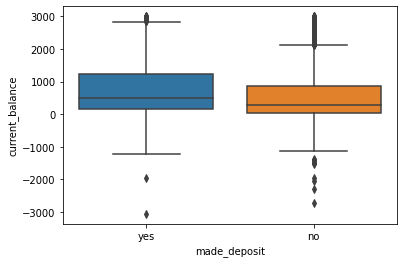

In [13]:
sns.boxplot(x = 'made_deposit', y = 'current_balance', data = df[df.current_balance<=3000])
plt.show()

Now, we examine how customers' education level affect their decision to deposit.

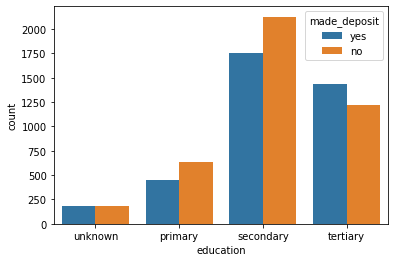

In [14]:
sns.countplot(x = 'education', hue = 'made_deposit', data = df, order = ['unknown', 'primary', 'secondary', 'tertiary'])
plt.show()

We can see only when people have tertiary education, the number who deposits outnumber those who don't.
Now, we see how age correlates with the decision of making deposit.

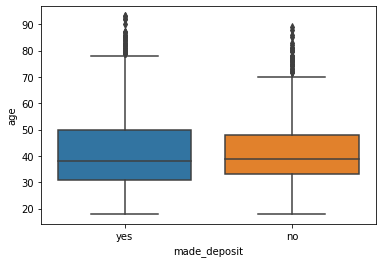

In [15]:
sns.boxplot(x = 'made_deposit', y = 'age', data = df)
plt.show()

There are no noticeable difference in age between those make deposit and those who don't.
Now, take a look on how

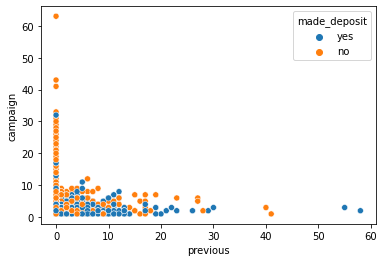

In [16]:
sns.scatterplot(x = 'previous', y = 'campaign', 
                data = df,
                hue = 'made_deposit')
plt.show()

Now, we create a dummy version of the dataset, to see whether each value on categorical variables has significance on customers' decision to deposit.

In [17]:
df_dum = pd.get_dummies(df)

In [18]:
df_dum.drop(['defaulted?_no', 'housing_no', 'has_loan_no', 'made_deposit_no', 'cc_tr'], axis = 1, inplace = True)

Let's see how each variables and categorical values correlate to the customers' decision on making deposit.

In [19]:
df_dum.corr(method = 'pearson')[['made_deposit_yes']].sort_values(by = 'made_deposit_yes', ascending = False, key = abs)

,made_deposit_yes
made_deposit_yes,1.000000
poutcome_success,0.288618
last_contact_unknown,-0.252461
poutcome_unknown,-0.230137
last_contact_cellular,0.221521
housing_yes,-0.208218
last_contact_month_may,-0.171572
days_since_last_contact,0.148349
previous,0.137195
last_contact_month_mar,0.135297


Let's have a heatmap consisting correlation between variables.

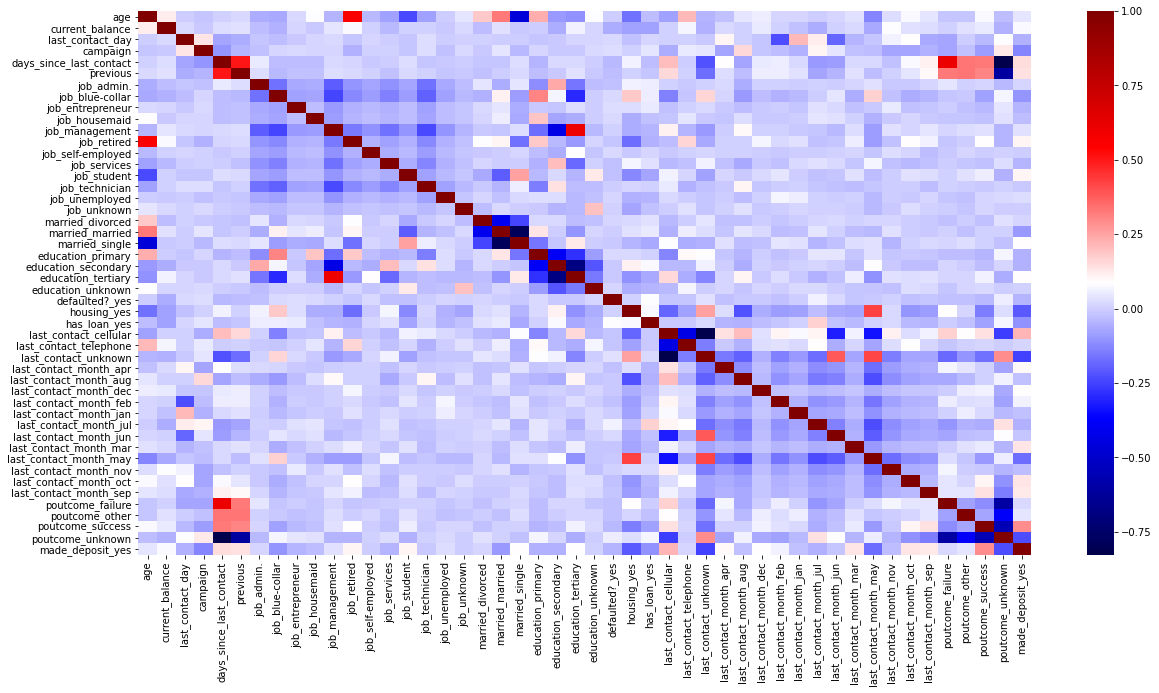

In [20]:
plt.figure(figsize = (20,10))
sns.heatmap(df_dum.corr(), cmap = 'seismic')
plt.show()

From the table and heatmap above, we can can conclude that the most correlated variables to decision of making deposit are 'poutcome' which indicates the outcome of previous marketing campaign and 'last_contact' which shows the type of communication used for previous call to customer.

# Machine Learning

## Train-Test-Split

We split the data set into train set and test set. The test set gets 20% of the overall data, while the rest goes to train data.
The split is done in stratified fashion. Each set contains the same percentage of samples of each target class (made_deposit: yes/no) as the complete set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df.drop(['campaign', 'days_since_last_contact', 'last_contact_day', 'cc_tr'], axis = 1, inplace = True)

In [23]:
X = df.drop('made_deposit', axis=1)
y = df["made_deposit"].replace({"yes": 1, "no": 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42, stratify = y)

## Importing API

These are the tools that will be used in the modelling section.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn import set_config
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
from matplotlib.ticker import ScalarFormatter

sss = StratifiedKFold()

## Creating Transformer Pipelines

We build necessary transformer pipeline for the models. There will be two pipelines, one for logistic regression and MLP model which need standardization for to handle its numerical variables, the other for random forest model which does not need standardization. Both pipelines have one-hot-encoder tool to handle categorical variables.

In [25]:
categorical = X.select_dtypes(exclude=np.number).columns.tolist()

numerical = X.select_dtypes(include=np.number).columns.tolist()

In [26]:
preprocessor1 = ColumnTransformer(
    [('one-hot-encoder', OneHotEncoder(handle_unknown="ignore"), categorical), 
     ('standard-scaler', StandardScaler(), numerical)], 
    sparse_threshold=0)

In [27]:
preprocessor2 = ColumnTransformer(
    [('one-hot-encoder', OneHotEncoder(handle_unknown="ignore"), categorical)],
    sparse_threshold=0, remainder='passthrough')

Here's the diagram of the transformer for logistic regression and MLP.

In [28]:
set_config(display='diagram')
preprocessor1

ColumnTransformer(sparse_threshold=0,
                  transformers=[('one-hot-encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'married', 'education', 'defaulted?',
                                  'housing', 'has_loan', 'last_contact',
                                  'last_contact_month', 'poutcome']),
                                ('standard-scaler', StandardScaler(),
                                 ['age', 'current_balance', 'previous'])])

Here's the diagram of the transformer for Random Forest.

In [29]:
preprocessor2

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('one-hot-encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'married', 'education', 'defaulted?',
                                  'housing', 'has_loan', 'last_contact',
                                  'last_contact_month', 'poutcome'])])

Declare the models. PCA exclusively only used for the logistic regression model.

In [30]:
pca = PCA(random_state = 42)
LR = LogisticRegression(random_state = 42)
RF = RandomForestClassifier(random_state = 42)
MLP = MLPClassifier(random_state=42, activation = 'logistic')

## Modelling

We will tune the hyperparameter using GridSearchCV method. We set the parameters and let the algorithm look which parameter yield the best results. The metrics we will use is F1 Score. The F1 score is the harmonic mean of the precision and recall, which is resistant to imbalanced class, which is the case for this data.

### Logistic Regression

Now we build Logistic Regression algorithm. The parameters we are going to look for are whether the algorithm applies regularization penalty or not and if applied, how strong the regularization is. We also look for how many components resulted by the PCA.

In [31]:
parameters1 = {'PCA__n_components': [2,5,10,20],  
               'LR__penalty': ['l2', 'none'],'LR__C':[0.001,0.01,1,5,10,25],
              }

GS1 = GridSearchCV(Pipeline([('Transformer', preprocessor1),
                             ('PCA', PCA(random_state=42)), ('LR', LR)]), 
                 param_grid = parameters1, scoring = 'f1', cv = sss)

In [32]:
GS1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformer',
                                        ColumnTransformer(sparse_threshold=0,
                                                          transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'married',
                                                                          'education',
                                                                          'defaulted?',
                                                                          'housing',
                                                                          'has_loan',
                                                                          'last_contact',
                                                                          'last_contact_month',
                                                                          'poutcome']),
                                                                        ('standard-scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'current_balance',
                                                                          'previous'])])),
                                       ('PCA', PCA(random_state=42)),
                                       ('LR',
                                        LogisticRegression(random_state=42))]),
             param_grid={'LR__C': [0.001, 0.01, 1, 5, 10, 25],
                         'LR__penalty': ['l2', 'none'],
                         'PCA__n_components': [2, 5, 10, 20]},
             scoring='f1')

In [33]:
GS1_results = pd.DataFrame(GS1.cv_results_)

Now we check 10 best models for logistic regression.

In [34]:
GS1_results[['param_LR__C', 'param_LR__penalty', 'param_PCA__n_components',
            'mean_test_score']].sort_values(by=['mean_test_score'], ascending = False).head(10)

,param_LR__C,param_LR__penalty,param_PCA__n_components,mean_test_score
11,0.01,l2,20,0.647175
18,1,l2,10,0.642249
10,0.01,l2,10,0.642210
30,5,none,10,0.642042
38,10,none,10,0.642042
14,0.01,none,10,0.642042
26,5,l2,10,0.642042
22,1,none,10,0.642042
42,25,l2,10,0.642042
6,0.001,none,10,0.642042


We can see among the 10 top models, the mean F1-score do not vary greatly. All fell within 2 digits behind comma. Let's visualize how the specification of the model yield the F1-score. We will see how the application of penalty, regularization strength, and the number of components affect F1 score.

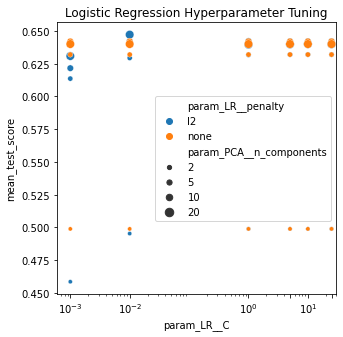

In [35]:
plt.figure(figsize=(5,5))
ax_lr = sns.scatterplot(x = 'param_LR__C', y = 'mean_test_score', hue = 'param_LR__penalty', data = GS1_results, size = 'param_PCA__n_components')
plt.title('Logistic Regression Hyperparameter Tuning')
ax_lr.set_xscale('log')
ax_lr.set_xticks([0.001,0.01,1,5,10,25])
plt.xlim(-5,30)
plt.legend(loc='center right')
plt.show()

The models with higher n_components yield higher F1-score, while the regularization strength yield pretty much similar results accross all value. For testing data, we are going to use the parameters which yields highest F1 score. This i

In [36]:
GS1.best_params_

{'LR__C': 0.01, 'LR__penalty': 'l2', 'PCA__n_components': 20}

### Random Forest

Now we build Random Forest algorithm. The parameters we are going to look for are critetion, forest depth, minimum samples in each leaf of the tree, and the maximum number of features to consider when looking for the best split

In [37]:
parameters2 = {'RF__criterion': ['gini', 'entropy'],
              "RF__max_depth" : [5,10,20,50],
               "RF__min_samples_leaf":[1,2,3,5,10,20,25,50,100],
               "RF__max_features":["auto","log2",None]
              }

GS2 = GridSearchCV(Pipeline([('Transformer', preprocessor2),
                             ('RF', RandomForestClassifier(random_state = 42))]), 
                   param_grid = parameters2, scoring = 'f1', cv = sss)

In [38]:
GS2.fit(X_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'married',
                                                                          'education',
                                                                          'defaulted?',
                                                                          'housing',
                                                                          'has_loan',
                                                                          'last_contact',
                                                                          'last_contact_month',
                                                                          'poutcome'])])),
                                       ('RF',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'RF__criterion': ['gini', 'entropy'],
                         'RF__max_depth': [5, 10, 20, 50],
                         'RF__max_features': ['auto', 'log2', None],
                         'RF__min_samples_leaf': [1, 2, 3, 5, 10, 20, 25, 50,
                                                  100]},
             scoring='f1')

In [39]:
GS2_results = pd.DataFrame(GS2.cv_results_)

In [40]:
GS2_results[['param_RF__criterion', 'param_RF__max_depth', 'param_RF__max_features',
       'param_RF__min_samples_leaf',
            'mean_test_score']].sort_values(by=['mean_test_score'], ascending = False).head(10)

,param_RF__criterion,param_RF__max_depth,param_RF__max_features,param_RF__min_samples_leaf,mean_test_score
56,gini,20,auto,3,0.673212
92,gini,50,log2,3,0.671857
91,gini,50,log2,2,0.670595
173,entropy,20,log2,3,0.670085
65,gini,20,log2,3,0.669994
200,entropy,50,log2,3,0.669612
199,entropy,50,log2,2,0.669519
183,entropy,20,None,5,0.669401
172,entropy,20,log2,2,0.669382
83,gini,50,auto,3,0.669169


We can see among the 10 top models. Top 10 models yield F1 score between 0.66 to 0.67 in F1 score. Let's visualize how the specification of the model yield the F1-score.

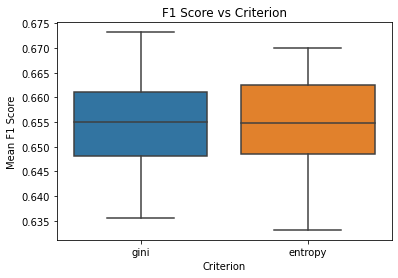

In [41]:
sns.boxplot(y = 'mean_test_score', x = 'param_RF__criterion', data = GS2_results)
plt.ylabel('Mean F1 Score')
plt.xlabel('Criterion')
plt.title('F1 Score vs Criterion')
plt.show()

The model's critetion does not affect the model's performance much.

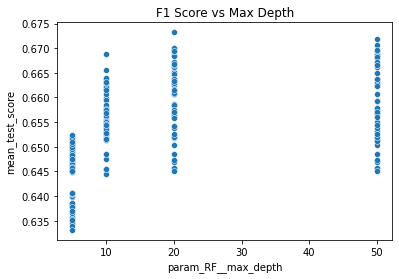

In [42]:
sns.scatterplot(y = 'mean_test_score', x = 'param_RF__max_depth', data = GS2_results)
plt.title('F1 Score vs Max Depth')
plt.show()

In general, the deeper the tree, the better the model performs.

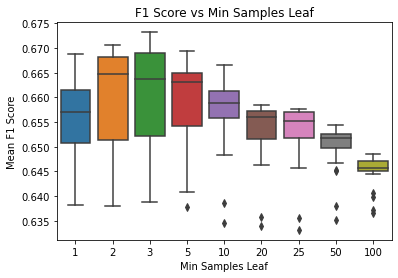

In [43]:
sns.boxplot(y = 'mean_test_score', x = 'param_RF__min_samples_leaf', data = GS2_results)
plt.title('F1 Score vs Min Samples Leaf')
plt.ylabel('Mean F1 Score')
plt.xlabel('Min Samples Leaf')
plt.show()

We can conclude that 2 and 3 are the optimum number of samples in a leaf. The higher the minimum of samoles, the model tends to perform worse.

In [44]:
GS2.best_params_

{'RF__criterion': 'gini',
 'RF__max_depth': 20,
 'RF__max_features': 'auto',
 'RF__min_samples_leaf': 3}

### Multi-layer Perceptron

Now we build Multi-layer Perceptron, a neural network algorithm. The parameters we are going to look for are hidden layer sizes, solver for weight optimzation, type of Learning rate schedule, and intial learning rate used

In [45]:
parameters3 = {'PCA__n_components': [5,10,20],
               'MLP__hidden_layer_sizes': [5, 10, 25, 50, 80, 100],
               'MLP__solver' :["adam","sgd"],
               'MLP__learning_rate' :['constant', 'adaptive'],
               'MLP__learning_rate_init' :[0.0001,0.001]
              }

GS3 = GridSearchCV(Pipeline([('Transformer', preprocessor1),
                             #('toarray', ArrayTransformer()),
                             ('PCA', PCA(random_state=42)), 
                             ('MLP', MLP)]), 
                 param_grid = parameters3, scoring = 'f1', cv = sss)

In [46]:
GS3.fit(X_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Transformer',
                                        ColumnTransformer(sparse_threshold=0,
                                                          transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job',
                                                                          'married',
                                                                          'education',
                                                                          'defaulted?',
                                                                          'housing',
                                                                          'has_loan',
                                                                          'last_contact',
                                                                          'last_contact_month',
                                                                          'poutcome']),
                                                                        ('standard-s...
                                                                         ['age',
                                                                          'current_balance',
                                                                          'previous'])])),
                                       ('PCA', PCA(random_state=42)),
                                       ('MLP',
                                        MLPClassifier(activation='logistic',
                                                      random_state=42))]),
             param_grid={'MLP__hidden_layer_sizes': [5, 10, 25, 50, 80, 100],
                         'MLP__learning_rate': ['constant', 'adaptive'],
                         'MLP__learning_rate_init': [0.0001, 0.001],
                         'MLP__solver': ['adam', 'sgd'],
                         'PCA__n_components': [5, 10, 20]},
             scoring='f1')

In [47]:
GS3_results = pd.DataFrame(GS3.cv_results_)

In [48]:
GS3_results[['param_MLP__hidden_layer_sizes', 'param_MLP__learning_rate',
       'param_MLP__learning_rate_init', 'param_MLP__solver',
       'param_PCA__n_components',
            'mean_test_score']].sort_values(by=['mean_test_score'], ascending = False).head(10)

,param_MLP__hidden_layer_sizes,param_MLP__learning_rate,param_MLP__learning_rate_init,param_MLP__solver,param_PCA__n_components,mean_test_score
62,25,adaptive,0.0001,adam,20,0.646815
50,25,constant,0.0001,adam,20,0.646815
134,100,adaptive,0.0001,adam,20,0.646344
122,100,constant,0.0001,adam,20,0.646344
74,50,constant,0.0001,adam,20,0.645260
86,50,adaptive,0.0001,adam,20,0.645260
140,100,adaptive,0.001,adam,20,0.645021
128,100,constant,0.001,adam,20,0.645021
98,80,constant,0.0001,adam,20,0.644357
110,80,adaptive,0.0001,adam,20,0.644357


We can see among the 10 top models. All of top 10 models yield F1 score between 0.64, there are almost no difference between them with high parameter varaince, except PCA n_component, with 20 components

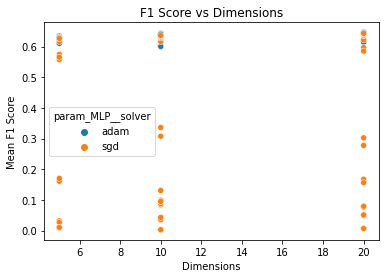

In [49]:
sns.scatterplot(y = 'mean_test_score', x = 'param_PCA__n_components', data = GS3_results, hue = 'param_MLP__solver')
plt.ylabel('Mean F1 Score')
plt.xlabel('Dimensions')
plt.title('F1 Score vs Dimensions')
plt.show()

From chart above, we conclude that in general, the model performs better with higher PCA dimension.

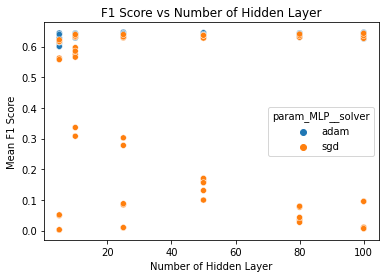

In [50]:
sns.scatterplot(y = 'mean_test_score', x = 'param_MLP__hidden_layer_sizes', data = GS3_results, hue = 'param_MLP__solver')
plt.ylabel('Mean F1 Score')
plt.xlabel('Number of Hidden Layer')
plt.title('F1 Score vs Number of Hidden Layer')
plt.show()

The performance of the model varies accross number of hidden layer. From there we can conclude that the number of hidden layer does not affect the performance.

In [51]:
GS3.best_params_

{'MLP__hidden_layer_sizes': 25,
 'MLP__learning_rate': 'constant',
 'MLP__learning_rate_init': 0.0001,
 'MLP__solver': 'adam',
 'PCA__n_components': 20}

## Model Evaluation

Now, we will see how the models perform against the test set. First, we fit the models, then test them and record the performance.

In [52]:
models = [['Logistic Regression', clone(GS1.best_estimator_)],
        [ 'Random Forest', clone(GS2.best_estimator_)],
        [ 'Multi-layer Perceptron', clone(GS3.best_estimator_)]]

model_performance_matrix = []
model_index = []
i = 0
for name, model in models:
    model_index.append(name)
    mod = model
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    models[i].append(y_pred.tolist())
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    model_performance_matrix.append([f1, precision, recall, accuracy])
    del mod, f1, precision, recall, accuracy, y_pred
    i+=1

We will plot a confusion matrix.

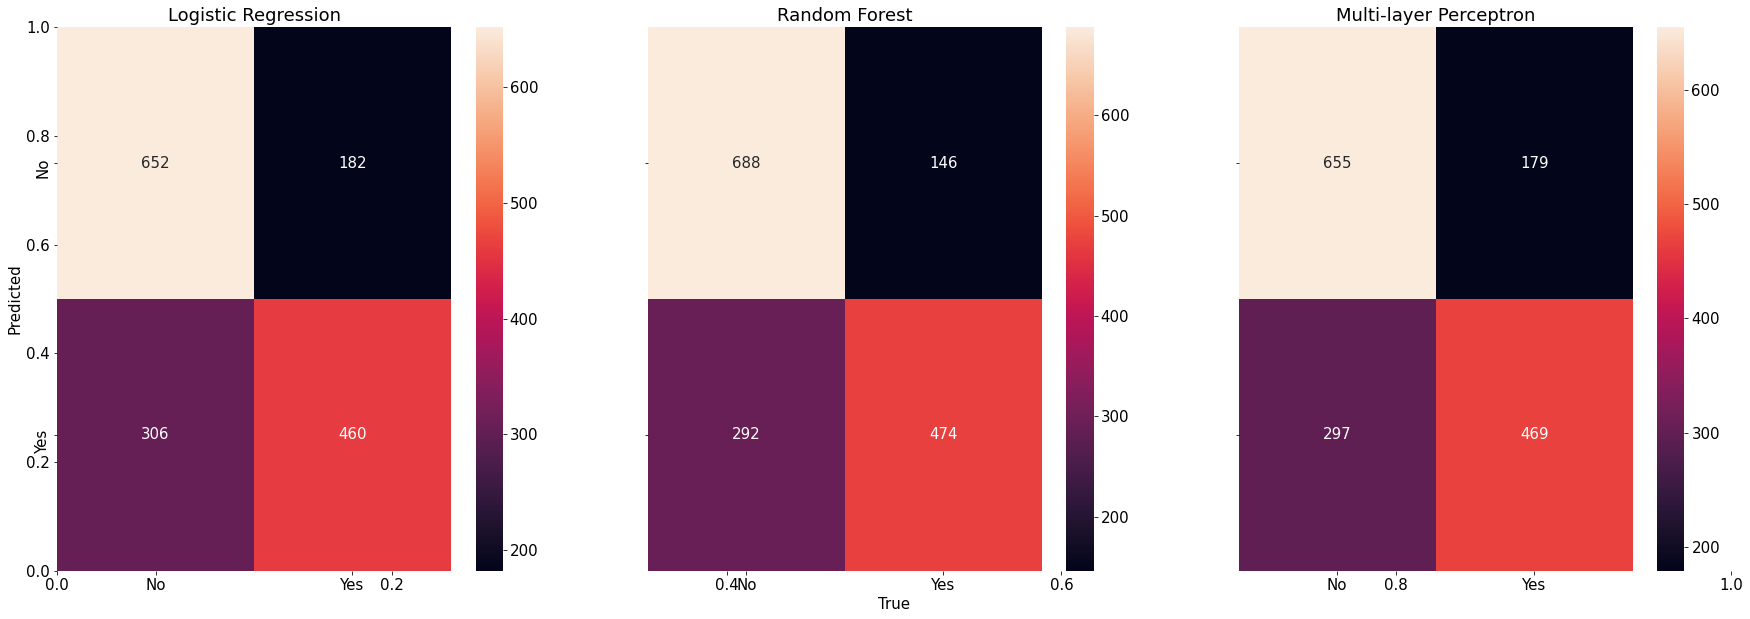

In [53]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,3, figsize=(30,10), sharex = True, sharey = True)
fig.add_subplot(111, frameon=False)
i = 0

for name, model, results in models:
    sns.heatmap(confusion_matrix(y_test, results)
                , ax = ax[i], annot = True, fmt="d")
    ax[i].xaxis.set_ticklabels(['No', 'Yes'])
    ax[i].yaxis.set_ticklabels(['No', 'Yes'])
    ax[i].set_title(name)
    i+=1

plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

Now we measure how each of the model performs. We use 4 metrics here, F1 Score, Precision, Recall, and Accuracy.

In [54]:
pd.DataFrame(model_performance_matrix, index=model_index, columns = ['F1', 'Precision', 'Recall', 'Accuracy'])

,F1,Precision,Recall,Accuracy
Logistic Regression,0.653409,0.716511,0.600522,0.69500
Random Forest,0.683983,0.764516,0.618799,0.72625
Multi-layer Perceptron,0.663366,0.723765,0.612272,0.70250


We can see that ini general, the models have decent precision, all above 0.7 while having pretty low recall at around 0.6.
Random forest outperformed the other models in every metrics here. Now we see the models' performance using area under the receiver operating characteristic (AUROC).

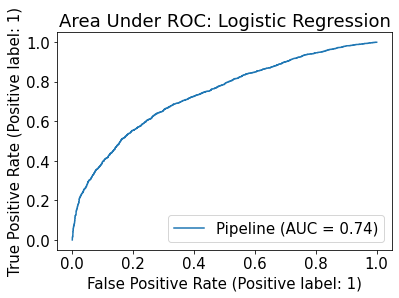

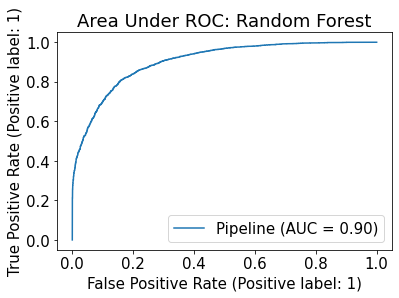

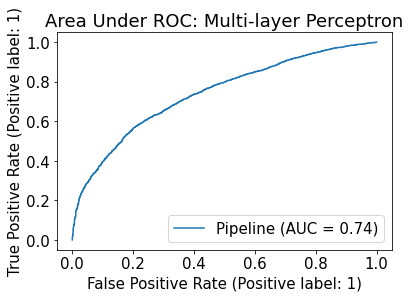

In [55]:
i=0
for name, model, results in models:
    plot_roc_curve(model, X_train, y_train)
    plt.title('Area Under ROC: {}'.format(name))
    i+=1
plt.show()

The ROC curve show that Random Forest perform the best against the other models with the highest area under ROC Curve.

# Conclusion

Predicting customers' decision to deposit for this problem is not easy, since the correlation between each variables and the target are not large. But with the right model preprocessing setup, clear pipeline, with using stratified method in splitting the train-test data and cross-validation, helped to make the models perform slightly better.
In general, the model can help answer the business problem to identify which customer made the deposit after getting this particular marketing campaign.